# Abdullah Abdelhakeem Amer   Gr/3   Practical 4

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import random
random.seed(0)

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
#x=[random.randrange(0,20,1) for i in range(20)]
x=np.linspace(0,20 ,dtype=int)
x=np.array(x)
y = -1*x + 2

In [3]:
print(f'x={x}\ny={y}')
print(f'x_shape={x.shape}\ny_shape={y.shape}')

x=[ 0  0  0  1  1  2  2  2  3  3  4  4  4  5  5  6  6  6  7  7  8  8  8  9
  9 10 10 11 11 11 12 12 13 13 13 14 14 15 15 15 16 16 17 17 17 18 18 19
 19 20]
y=[  2   2   2   1   1   0   0   0  -1  -1  -2  -2  -2  -3  -3  -4  -4  -4
  -5  -5  -6  -6  -6  -7  -7  -8  -8  -9  -9  -9 -10 -10 -11 -11 -11 -12
 -12 -13 -13 -13 -14 -14 -15 -15 -15 -16 -16 -17 -17 -18]
x_shape=(50,)
y_shape=(50,)


#### Plot your data points. 

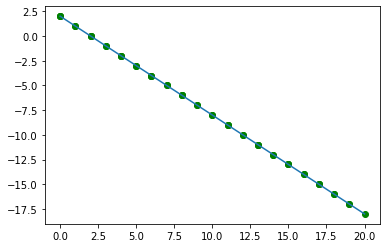

In [4]:
plt.scatter(x,y,color="green")
plt.plot(x,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

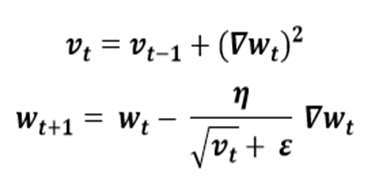

In [5]:
def ADAGRAD(x,y,maxEpochs,learningRate ,convergence , epsilon):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) #more columns x0 ,x1
    y=y.reshape(-1,1)     #(shape(20,1))
    m=(X.shape)[0]        #m=20
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    v=0
    while epoch < maxEpochs:
        count +=1
        
        ypredicted = X @ thetas # (50,2) @ (2,1) ===> (50,1)
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (old). 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m # (2,50) @ (50,1) ====>  (2,1)
        
        v= v + np.square(Gradient)
        
        
        thetas =thetas - ((learningRate * Gradient) / (np.sqrt(v) + epsilon)) #(2,1)
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas # (50,2) @ (2,1) ===> (50,1)
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (New). 
        
        loss.append(costNew) #loss list
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [6]:
#ADAGRAD(x,y,maxEpochs,learningRate=0.7 ,convergence , epsilon)
R2Score,thetas,ypredicted,loss,thetaList0,thetaList1,ypredictedEpochs=ADAGRAD(x,y,1000,0.9,0.0001 , 1e-8)
R2Score1,thetas1,ypredicted1,loss1,thetaList01,thetaList11,ypredictedEpochs1=ADAGRAD(x,y,1000,0.5,0.0001 , 1e-8)
R2Score2,thetas2,ypredicted2,loss2,thetaList02,thetaList12,ypredictedEpochs2=ADAGRAD(x,y,1000,0.1,0.0001 , 1e-8)

convergence occur after (114) iterations
convergence occur after (195) iterations
sorry Max_epochs (1000) have occured


In [7]:
R2Score
R2Score1
R2Score2
print(f'R2Score(alpha=0.9)={R2Score}\nR2Score(alpha=0.5)={R2Score1}\nR2Score(alpha=0.1)={R2Score2}')

R2Score(alpha=0.9)=0.9999036411613657
R2Score(alpha=0.5)=0.9998126735614732
R2Score(alpha=0.1)=0.9947005799966632


In [8]:
thetas

array([[ 1.89023514],
       [-0.99143117]])

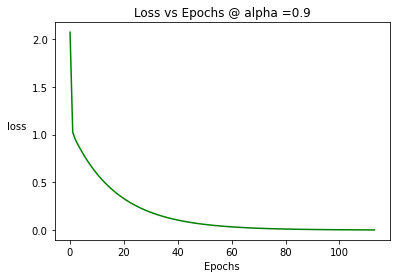

In [9]:
plt.plot(loss , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss       " , rotation =0)
plt.title("Loss vs Epochs @ alpha =0.9")
plt.show()

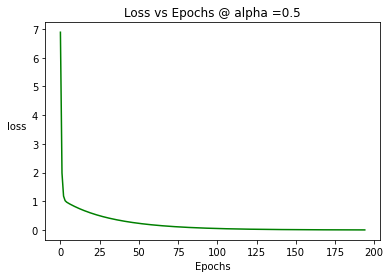

In [10]:
plt.plot(loss1 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss       " , rotation =0)
plt.title("Loss vs Epochs @ alpha =0.5")
plt.show()

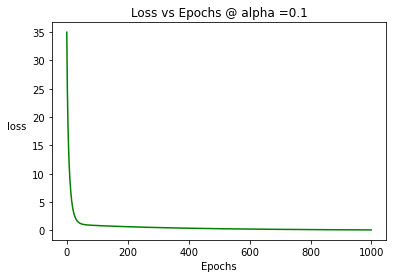

In [11]:
plt.plot(loss2 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss       " , rotation =0)
plt.title("Loss vs Epochs @ alpha =0.1")
plt.show()

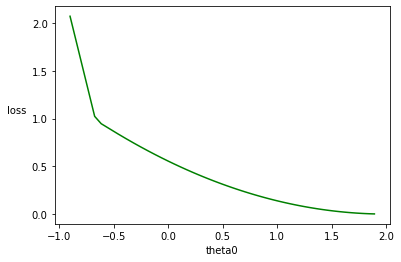

In [12]:
plt.plot(thetaList0,loss,color="green")
plt.xlabel("theta0")
plt.ylabel("loss       " , rotation =0)
plt.show()

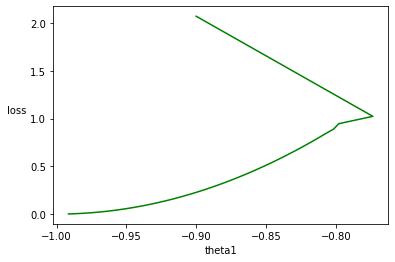

In [13]:
plt.plot(thetaList1,loss,color="green")
plt.xlabel("theta1")
plt.ylabel("loss      ",rotation =0 )
plt.show()

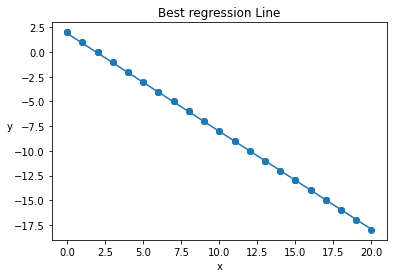

In [14]:
plt.scatter(x,y)
plt.plot(x,ypredicted)
plt.xlabel("x")
plt.ylabel("y" , rotation =0)
plt.title("Best regression Line")
plt.show()

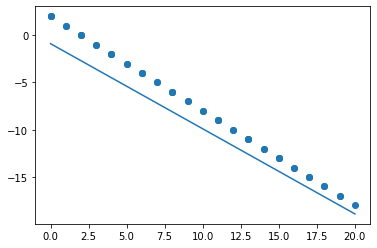

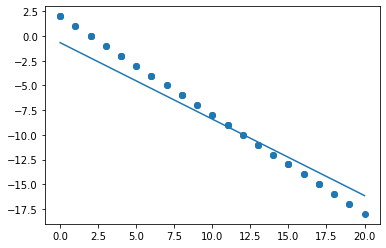

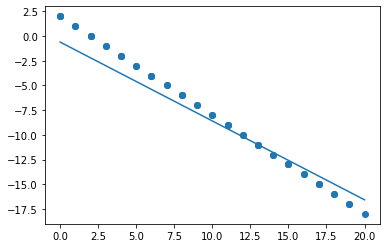

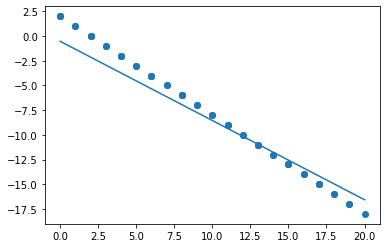

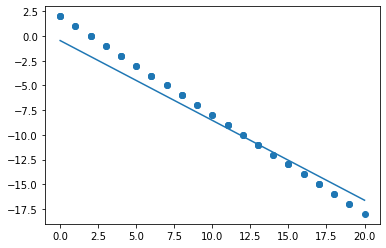

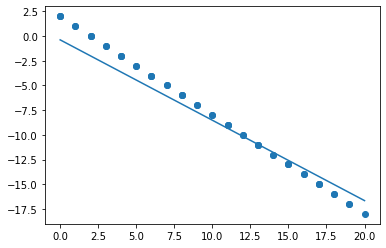

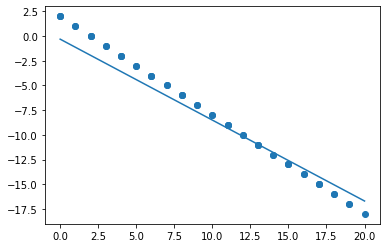

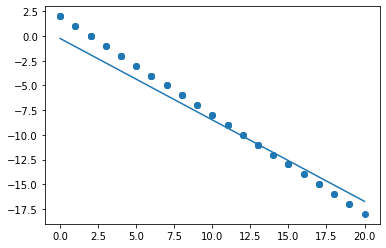

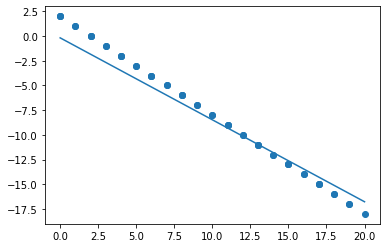

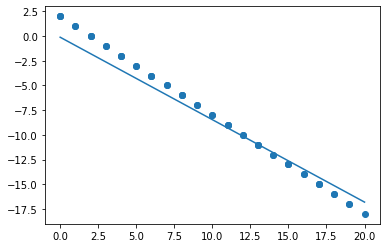

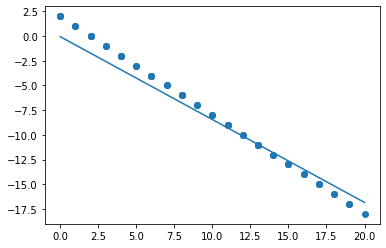

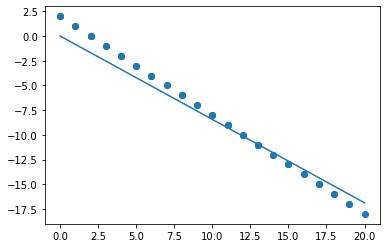

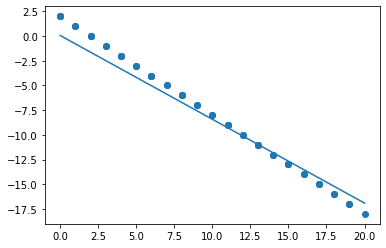

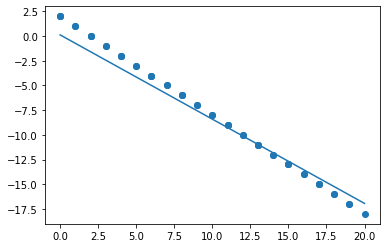

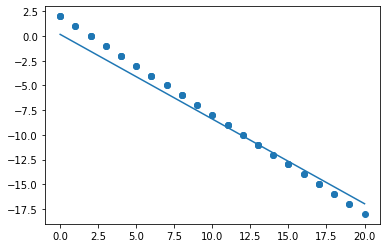

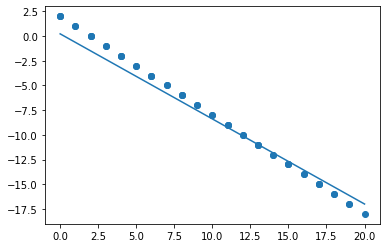

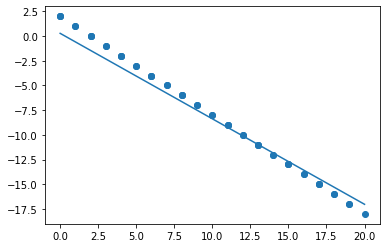

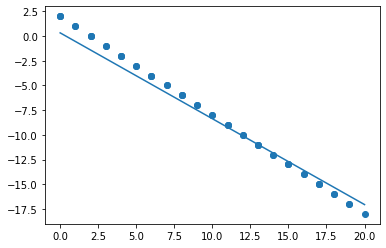

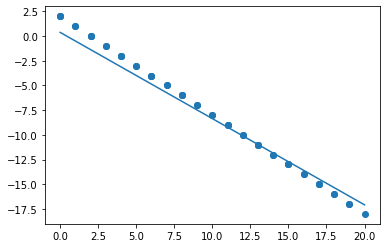

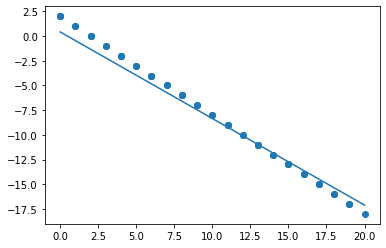

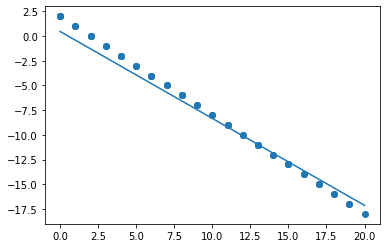

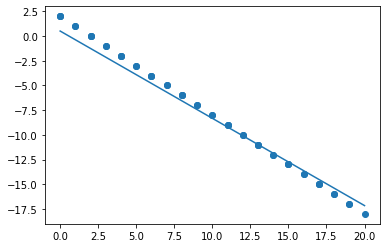

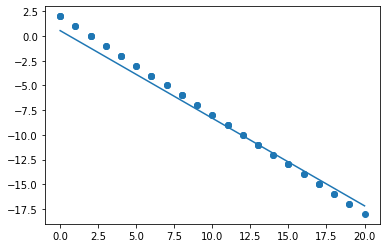

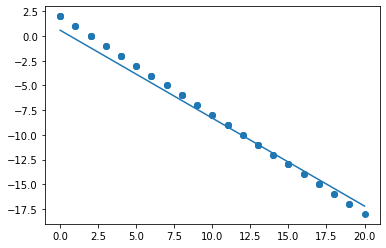

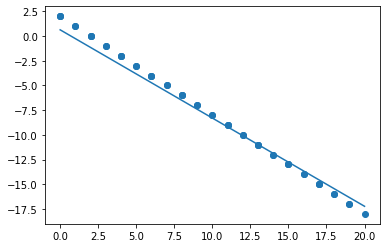

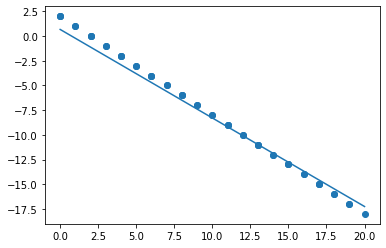

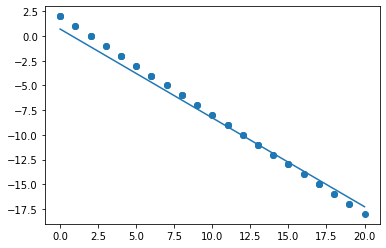

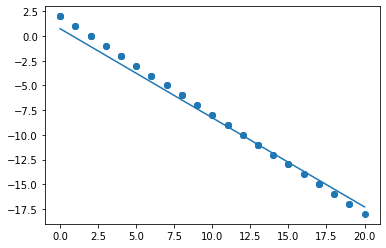

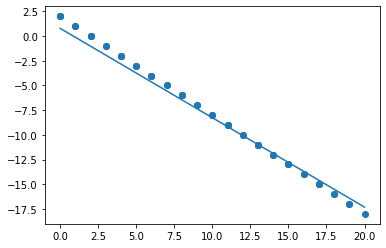

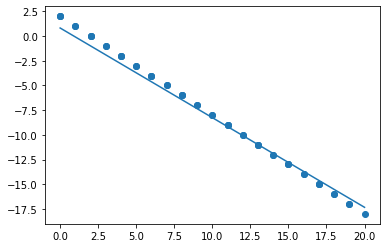

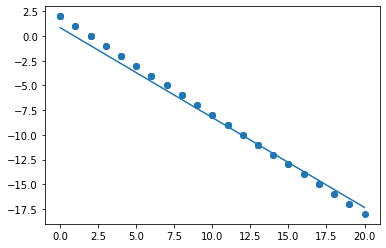

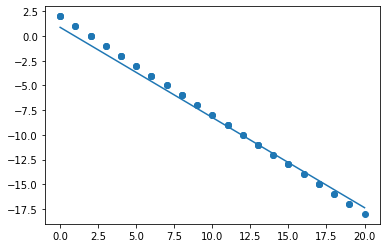

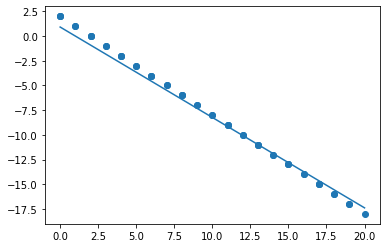

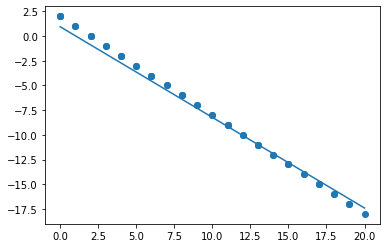

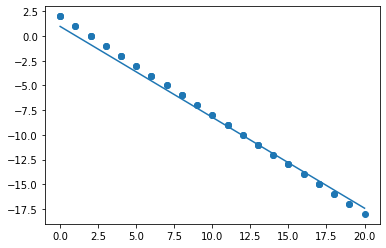

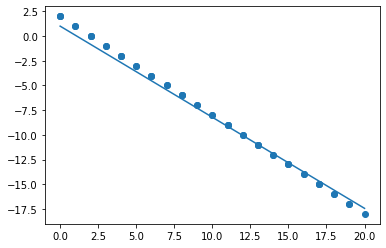

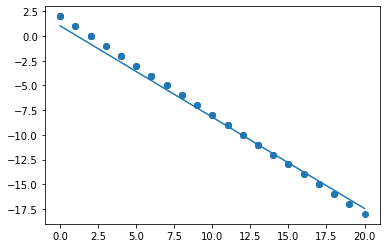

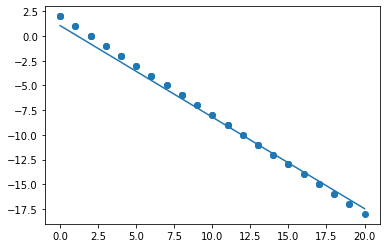

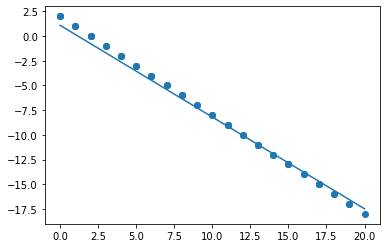

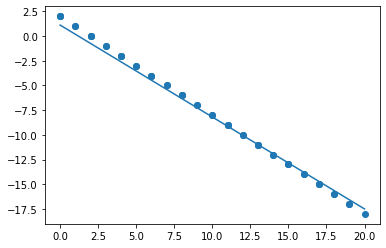

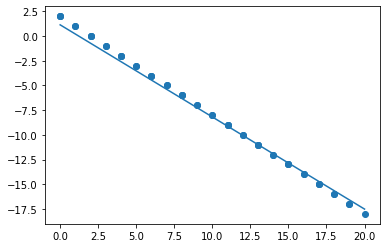

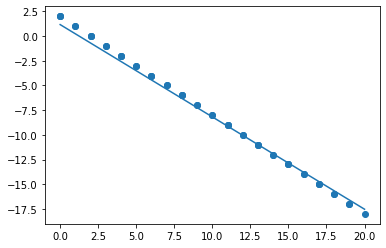

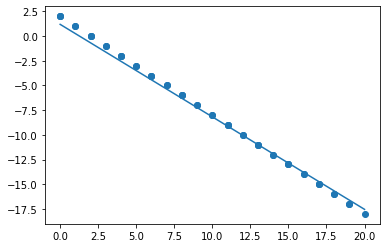

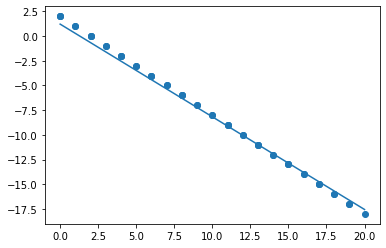

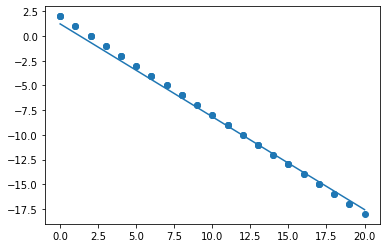

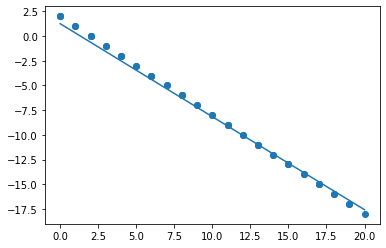

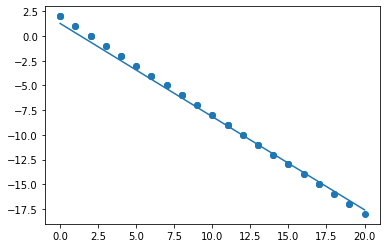

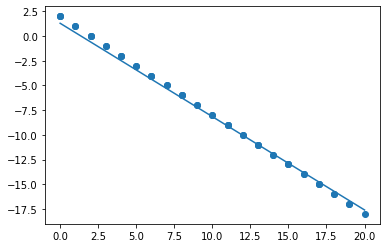

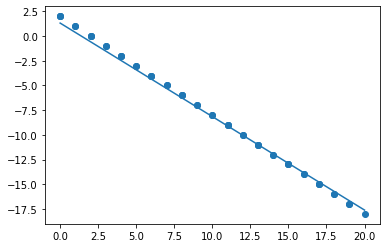

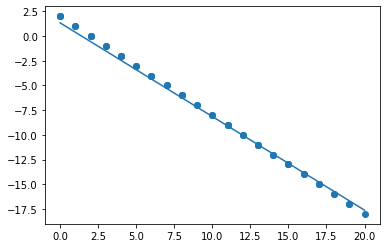

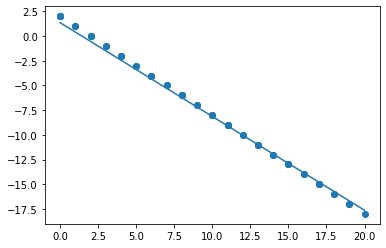

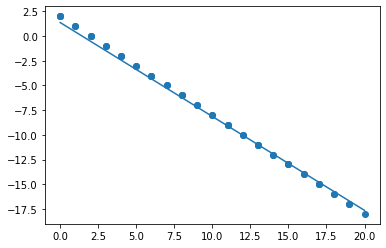

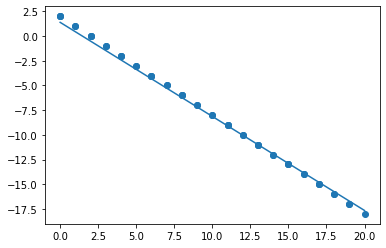

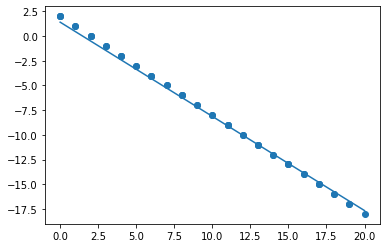

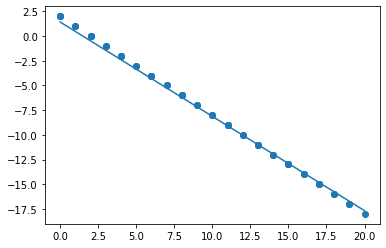

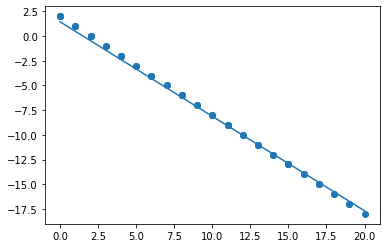

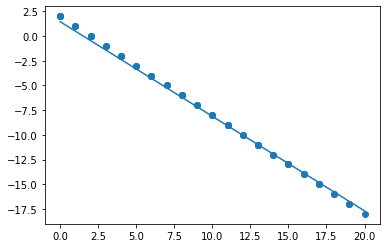

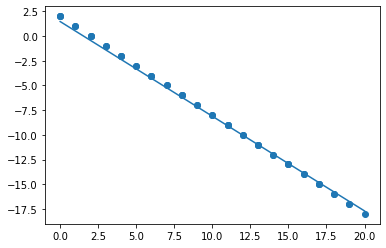

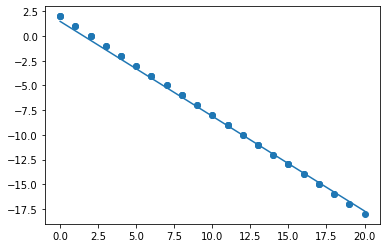

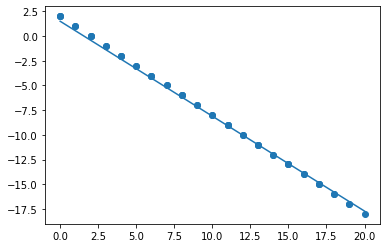

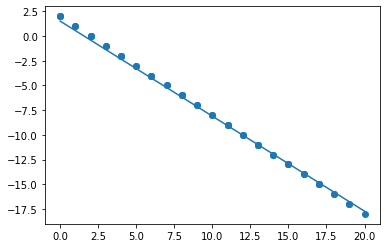

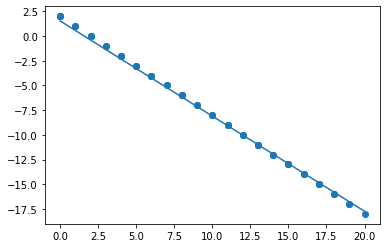

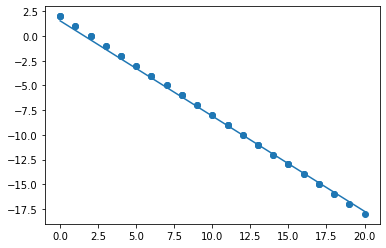

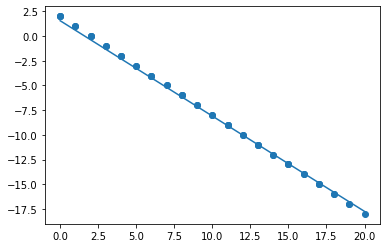

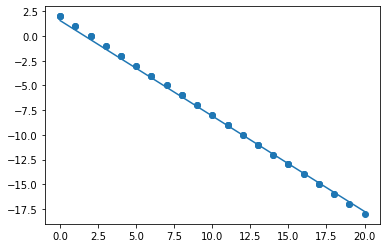

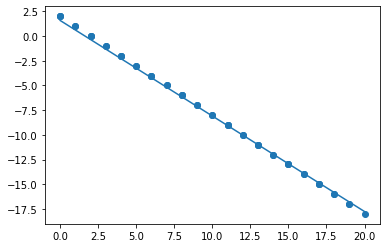

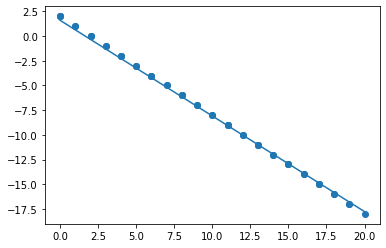

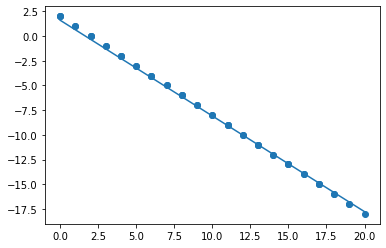

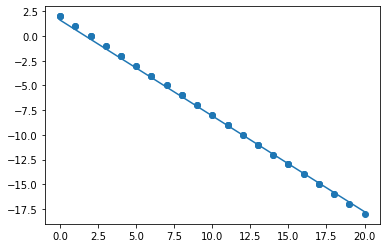

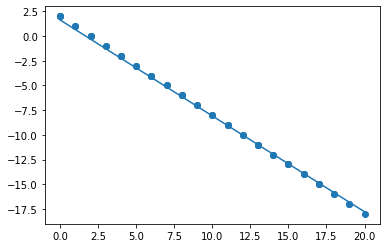

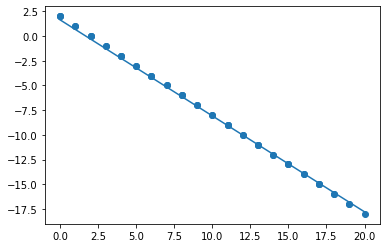

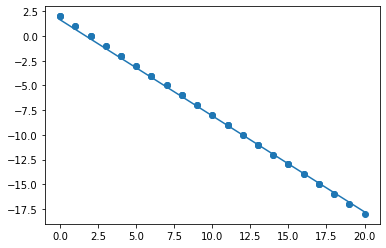

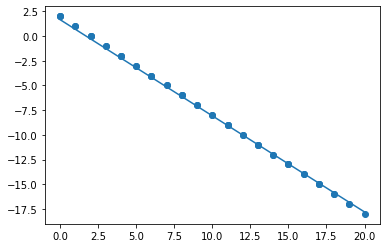

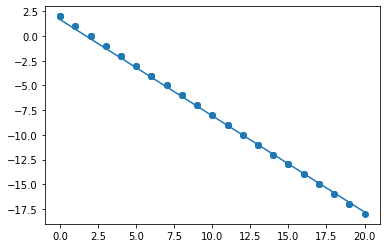

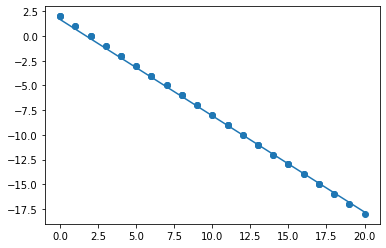

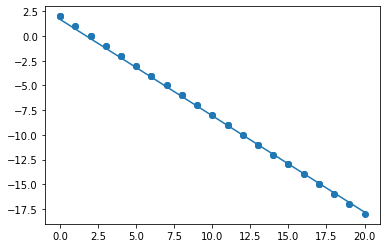

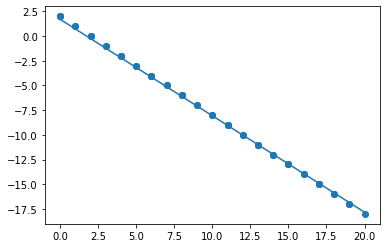

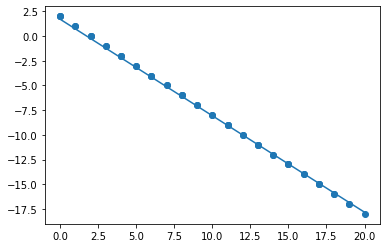

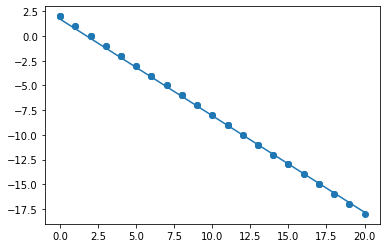

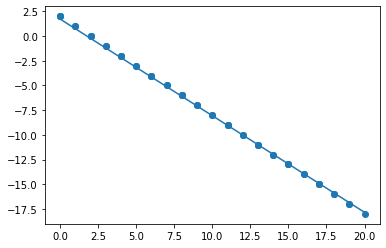

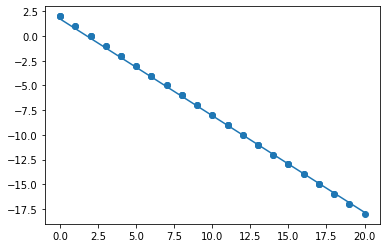

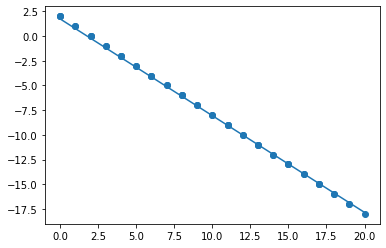

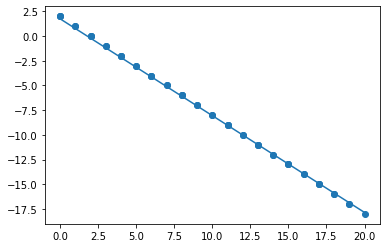

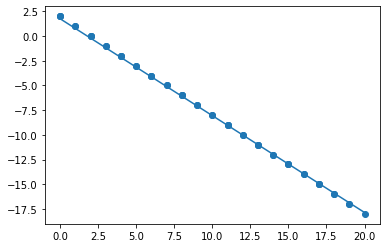

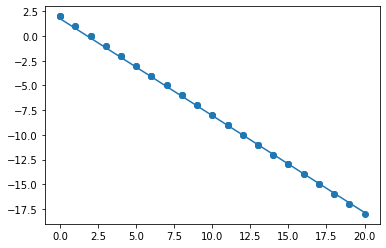

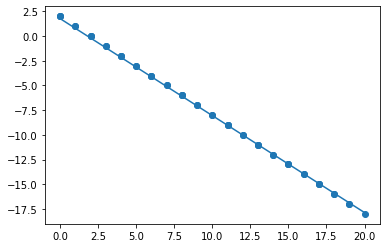

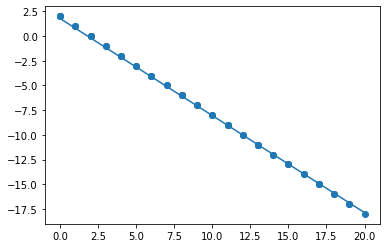

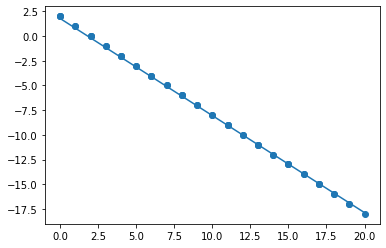

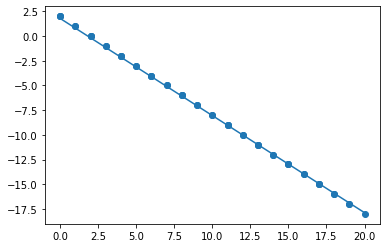

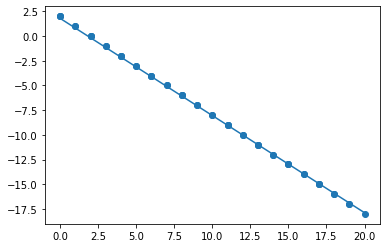

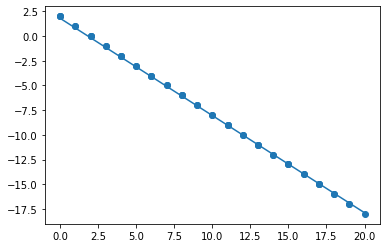

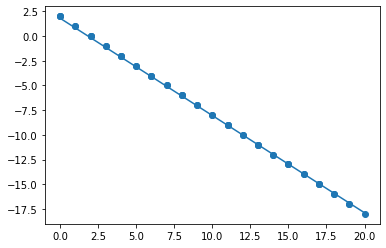

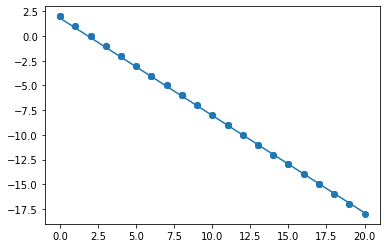

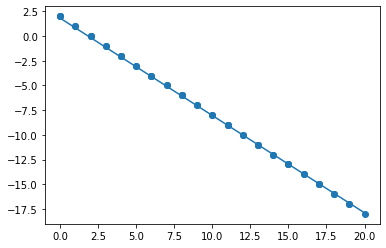

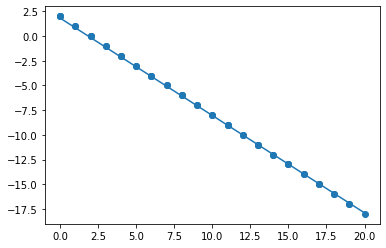

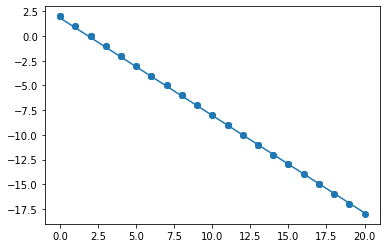

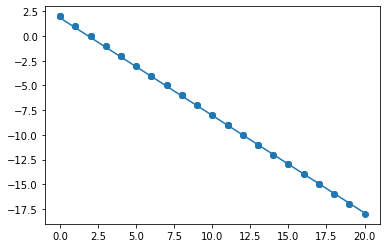

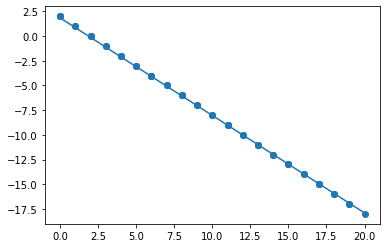

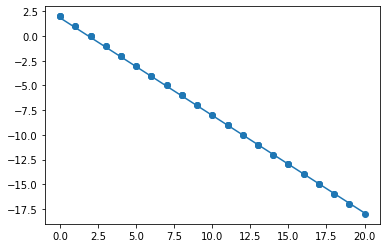

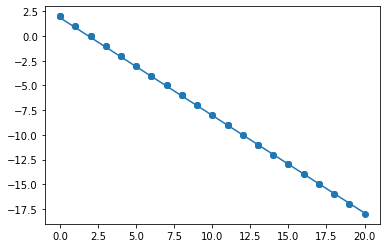

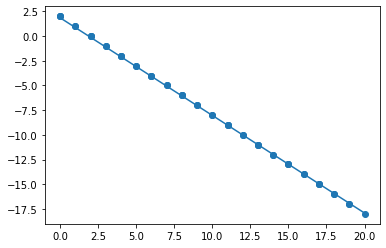

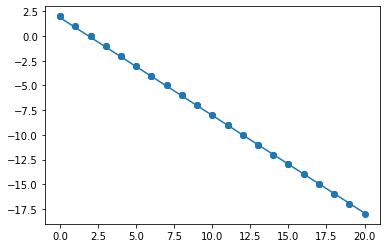

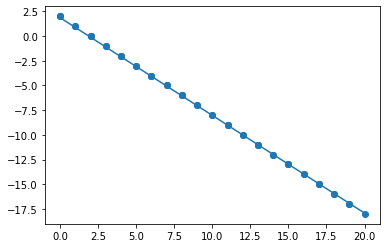

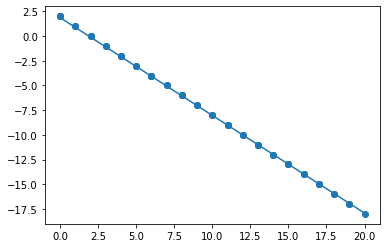

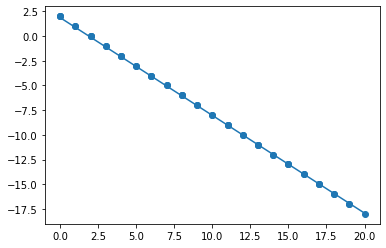

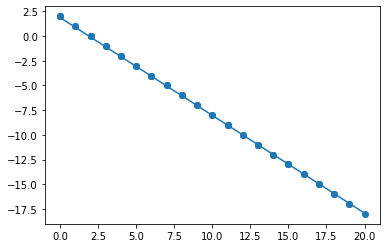

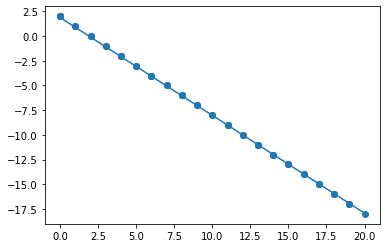

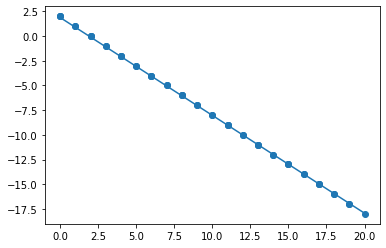

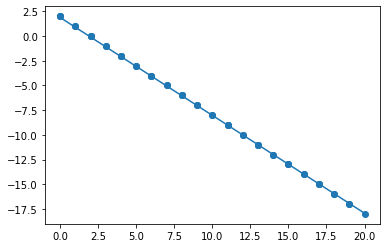

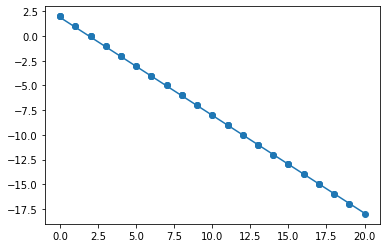

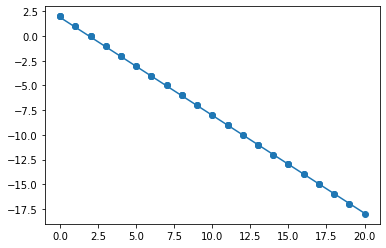

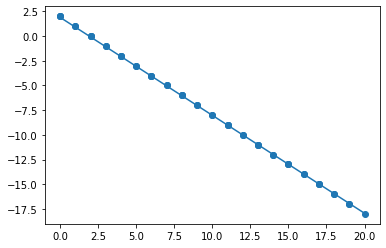

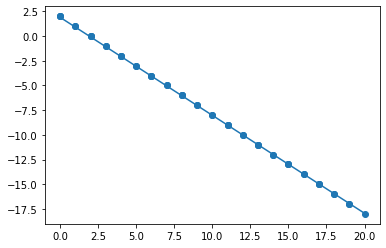

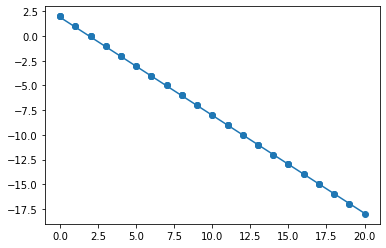

In [15]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)
    plt.show()

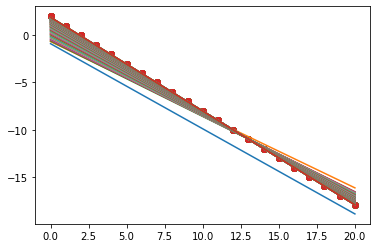

In [16]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

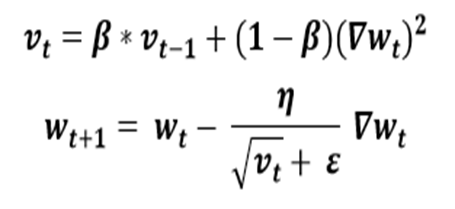

In [17]:
def RMSPROP(x,y,maxEpochs, beta , learningRate ,convergence , epsilon):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) 
    y=y.reshape(-1,1)     
    m=(X.shape)[0]       
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    v=0
    while epoch < maxEpochs:
        count +=1
        
        ypredicted = X @ thetas 
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m 
        
        v= (beta * v) +  ((1-beta)* (np.square(Gradient)))
        
        
        thetas =thetas - ((learningRate * Gradient) / (np.sqrt(v) + epsilon)) #(2,1)
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (New). 
        
        loss.append(costNew) #loss list
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [18]:
#RMSPROP(x,y,maxEpochs, beta , learningRate ,convergence , epsilon)
R2Score,thetas,ypredicted,loss,thetaList0,thetaList1,ypredictedEpochs=RMSPROP(x,y,1000, 0.9 , 0.1 , 0.001 , 1e-8)
R2Score1,thetas1,ypredicted1,loss1,thetaList01,thetaList11,ypredictedEpochs1=RMSPROP(x,y,1000, 0.8 , 0.1 , 0.001 , 1e-8)
R2Score2,thetas2,ypredicted2,loss2,thetaList02,thetaList12,ypredictedEpochs2=RMSPROP(x,y,1000, 0.7 , 0.1 , 0.001 , 1e-8)
R2Score3,thetas3,ypredicted3,loss3,thetaList03,thetaList13,ypredictedEpochs3=RMSPROP(x,y,1000, 0.6 , 0.1 , 0.001 , 1e-8)
R2Score4,thetas4,ypredicted4,loss4,thetaList04,thetaList14,ypredictedEpochs4=RMSPROP(x,y,1000, 0.5 , 0.1 , 0.001 , 1e-8)

convergence occur after (64) iterations
convergence occur after (45) iterations
convergence occur after (40) iterations
convergence occur after (67) iterations
convergence occur after (68) iterations


In [19]:
print(f'R2score@ alpha=0.1 and Beta = 0.9 : {R2Score}\nR2score@ alpha=0.1 and Beta = 0.9 : {R2Score1}\nR2score@ alpha=0.1 and Beta = 0.9 : {R2Score2}\nR2score@ alpha=0.1 and Beta = 0.9 : {R2Score3}\nR2score@ alpha=0.1 and Beta = 0.9 : {R2Score4}')

R2score@ alpha=0.1 and Beta = 0.9 : 0.9998547928526752
R2score@ alpha=0.1 and Beta = 0.9 : 0.9954486948630167
R2score@ alpha=0.1 and Beta = 0.9 : 0.987317180381563
R2score@ alpha=0.1 and Beta = 0.9 : 0.9887315340441234
R2score@ alpha=0.1 and Beta = 0.9 : 0.9885023798841622


In [20]:
thetas

array([[ 1.87104637],
       [-0.98834355]])

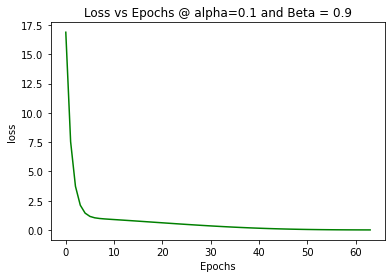

In [21]:
plt.plot(loss , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs @ alpha=0.1 and Beta = 0.9")
plt.show()

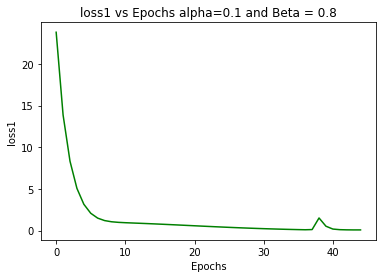

In [22]:
plt.plot(loss1 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss1")
plt.title("loss1 vs Epochs alpha=0.1 and Beta = 0.8")
plt.show()

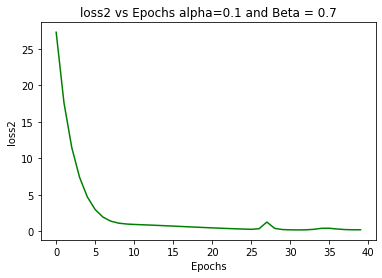

In [23]:
plt.plot(loss2 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss2")
plt.title("loss2 vs Epochs alpha=0.1 and Beta = 0.7")
plt.show()

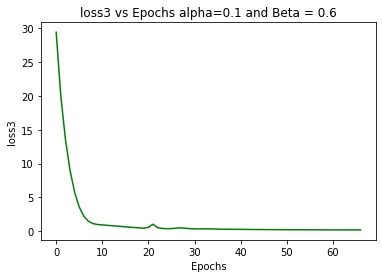

In [24]:
plt.plot(loss3 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss3")
plt.title("loss3 vs Epochs alpha=0.1 and Beta = 0.6")
plt.show()

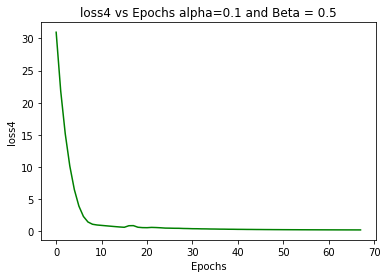

In [25]:
plt.plot(loss4 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss4")
plt.title("loss4 vs Epochs alpha=0.1 and Beta = 0.5")
plt.show()

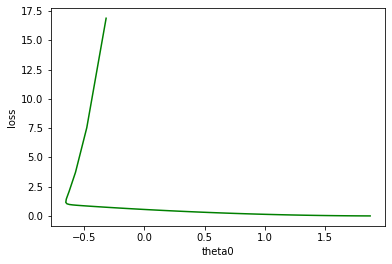

In [26]:
plt.plot(thetaList0,loss,color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.show()

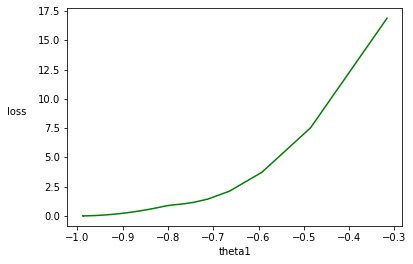

In [27]:
plt.plot(thetaList1,loss,color="green")
plt.xlabel("theta1")
plt.ylabel("loss           " , rotation =0)
plt.show()

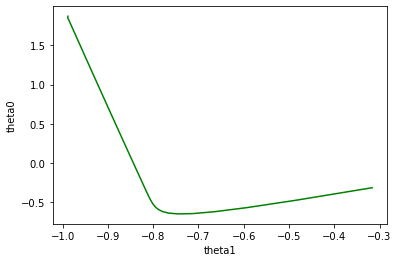

In [28]:
plt.plot(thetaList1,thetaList0,color="green")
plt.xlabel("theta1")
plt.ylabel("theta0")
plt.show()

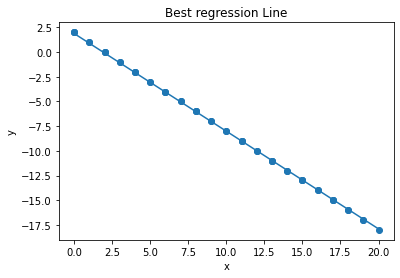

In [29]:
plt.scatter(x,y)
plt.plot(x,ypredicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best regression Line")
plt.show()

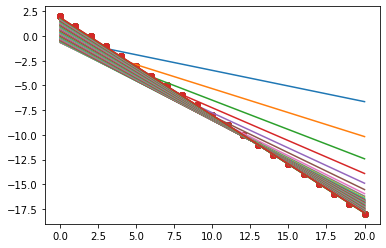

In [30]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

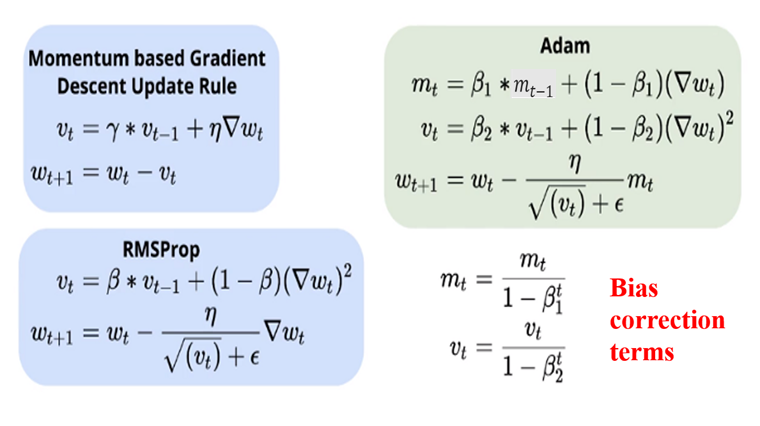

In [31]:
def ADAM(x,y,maxEpochs, beta1 , beta2 , learningRate ,convergence , epsilon):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) #more columns x0 ,x1
    y=y.reshape(-1,1)     #(shape(20,1))
    m=(X.shape)[0]        #m=20
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=1
    
    v=0
    mt=0
    while epoch < maxEpochs +1:
        count +=1
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (old). 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m # (2,20) @ (20,1) ====>  (2,1)
        
        mt = mt/(1-(beta1**epoch))
        v = v / (1-(beta2**epoch))
        
        mt=(beta1 * mt ) + ((1-beta1) * Gradient)
        v= (beta2 * v) +  ((1-beta2) * (np.square(Gradient)))
        
        
        thetas =thetas - ((learningRate * mt) / (np.sqrt(v) + epsilon)) #(2,1)
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (New). 
        
        loss.append(costNew) #loss list
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [32]:
#ADAM(x,y,maxEpochs, beta1=0.5 , beta2=0.5 , learningRate=0.1 ,convergence=0.0001 , epsilon=1e-4)
R2Score,thetas,ypredicted,loss,thetaList0,thetaList1,ypredictedEpochs=ADAM(x,y,1000, 0.1,0.6 , 0.1 , 0.0001 , 1e-4)
R2Score1,thetas1,ypredicted1,loss1,thetaList01,thetaList11,ypredictedEpoch1=ADAM(x,y,1000, 0.4,0.4 , 0.1 , 0.0001 , 1e-4)
R2Score2,thetas2,ypredicted2,loss2,thetaList02,thetaList12,ypredictedEpoch2=ADAM(x,y,1000, 0.6,0.3 , 0.1 , 0.0001 , 1e-4)
R2Score3,thetas3,ypredicted3,loss3,thetaList03,thetaList13,ypredictedEpoch3=ADAM(x,y,1000, 0.9,0.2 , 0.1 , 0.0001 , 1e-4)

convergence occur after (76) iterations
convergence occur after (179) iterations
sorry Max_epochs (1000) have occured
sorry Max_epochs (1000) have occured


In [33]:
R2Score
R2Score1
R2Score2
R2Score3
print(f'R2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): {R2Score}\nR2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): {R2Score1}\nR2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): {R2Score2}\nR2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): {R2Score3}')

R2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): 0.9928196037032636
R2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): 0.9999766694623925
R2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): 0.9990684341925
R2score @ B1=0.1 and B2=0.6 and alpha =0.1(const): 0.9948444461558361


In [34]:
thetas

array([[ 1.8237909 ],
       [-1.03039789]])

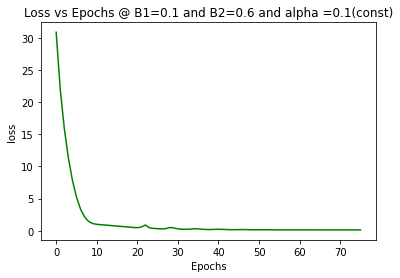

In [35]:
plt.plot(loss , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs @ B1=0.1 and B2=0.6 and alpha =0.1(const)")
plt.show()

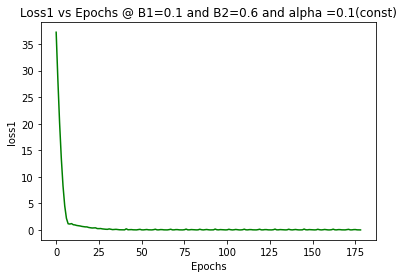

In [36]:
plt.plot(loss1 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss1")
plt.title("Loss1 vs Epochs @ B1=0.1 and B2=0.6 and alpha =0.1(const)")
plt.show()

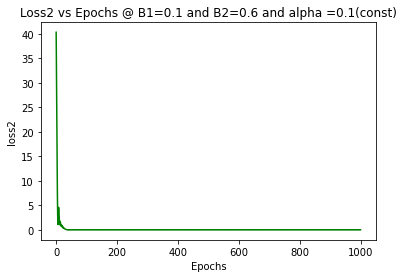

In [37]:
plt.plot(loss2 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss2")
plt.title("Loss2 vs Epochs @ B1=0.1 and B2=0.6 and alpha =0.1(const)")
plt.show()

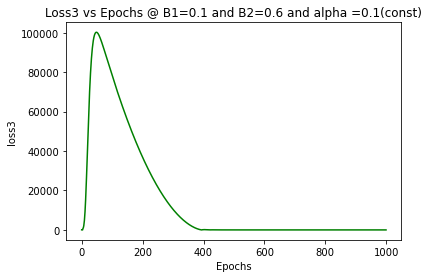

In [38]:
plt.plot(loss3 , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss3")
plt.title("Loss3 vs Epochs @ B1=0.1 and B2=0.6 and alpha =0.1(const)")
plt.show()

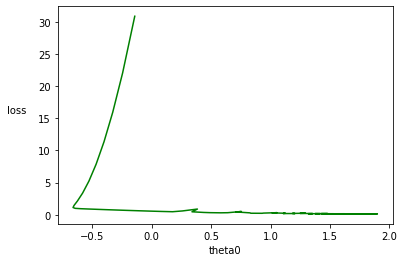

In [39]:
plt.plot(thetaList0,loss,color="green")
plt.xlabel("theta0")
plt.ylabel("loss           " , rotation =0)
plt.show()

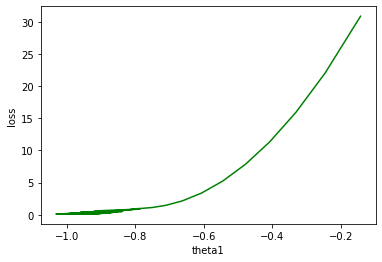

In [40]:
plt.plot(thetaList1,loss,color="green")
plt.xlabel("theta1")
plt.ylabel("loss")
plt.show()

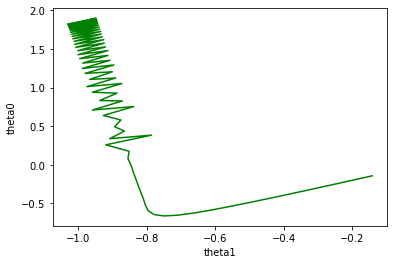

In [41]:
plt.plot(thetaList1,thetaList0,color="green")
plt.xlabel("theta1")
plt.ylabel("theta0")
plt.show()

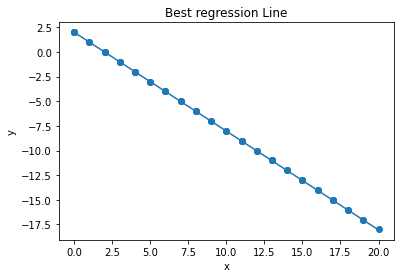

In [42]:
plt.scatter(x,y)
plt.plot(x,ypredicted1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best regression Line")
plt.show()

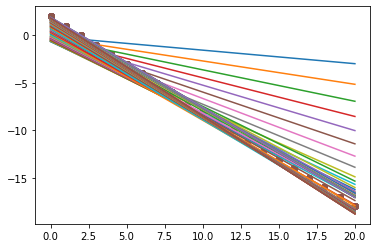

In [43]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

## Congratulations 
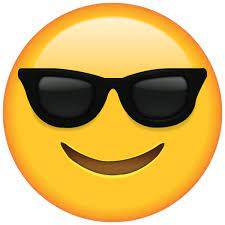